In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import median_absolute_deviation as mad

In [2]:
map_data = np.load('../../../outputs/tile_maps/S07XX_rf1XX_healpix_map.npz', allow_pickle=True)
map_data = {key:map_data[key].item() for key in map_data}
tile_maps = map_data['healpix_maps']
sat_maps = map_data['sat_map']
tile_map = tile_maps['0']
sat_map = sat_maps['0']

In [3]:
tile_map_median = [(np.median(i) if i != [] else np.nan ) for i in tile_map]
tile_map_scaled = np.asarray([(np.asarray(i) - np.nanmax(tile_map_median[:4000])) for i in tile_map])

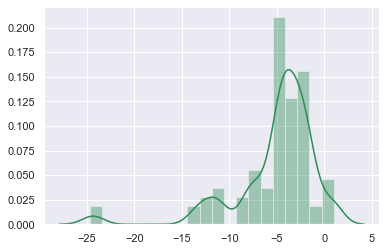

In [7]:
sns.distplot(tile_map_scaled[0], bins=20, color='seagreen')

In [8]:
def outliers_z_score(ys):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)


In [9]:
def outliers_modified_z_score(data):
    threshold = 3.5

    med_data = np.median(data)
    mad_data = mad(data)
    modified_z_scores = [0.6745 * (d - med_data) / mad_data for d in data]
    outliers = np.where(np.abs(modified_z_scores) > threshold)
    return outliers

In [10]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 0)
    upper_bound = quartile_3 + (iqr * 0)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [11]:
mads = [mad(i) for i in tile_map_scaled]

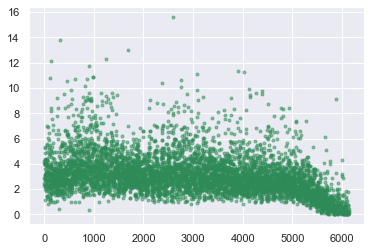

In [12]:
plt.scatter(range(6144), mads[:6144], marker='.', color='seagreen', alpha=0.5)

In [13]:
np.where(np.asarray(mads[:6000]) >= 10)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


(array([ 116,  134,  322,  455,  622,  811,  857,  894,  972,  980, 1253,
        1694, 2377, 2593, 2748, 2749, 3074, 3898, 4027]),)

In [14]:
t_num = 116
t_data = tile_map_scaled[t_num]
s_data = sat_map[t_num]

-7.149517
10.759697575378418
47


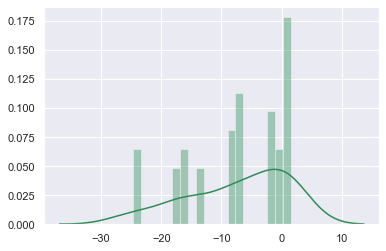

In [15]:
sns.distplot(t_data, bins=20, color='seagreen')
print(np.median(t_data))
print(mad(t_data))
print(len(t_data))

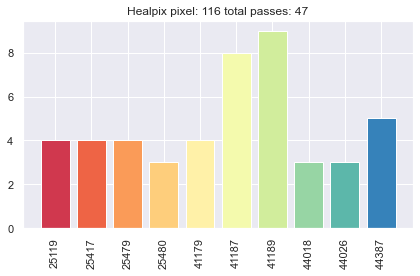

In [16]:
values, counts = np.unique(s_data, return_counts=True)
sns.set()
index = np.arange(len(values))
    
plt.bar(index, counts, color=sns.color_palette('Spectral', len(counts)))
plt.xticks(index, values, rotation=90)
plt.title(f'Healpix pixel: {t_num} total passes: {len(t_data)}')
plt.tight_layout()

In [17]:
sat_data = {v:np.asarray(t_data)[np.where(np.asarray(s_data) == v)] for v in values}

def hist_plt(sat_id):
    sns.distplot(sat_data[sat_id], bins=20, color='seagreen').set_title(f'Sat_ID: {sat_id} Counts: {len(sat_data[sat_id])}')

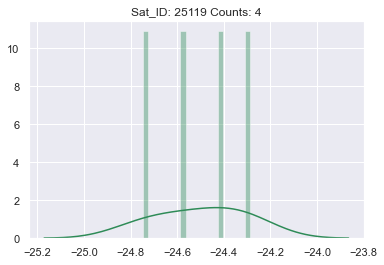

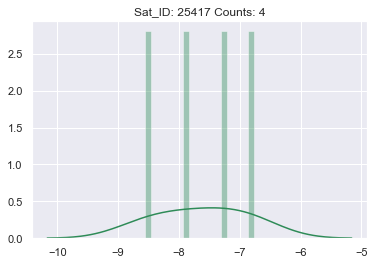

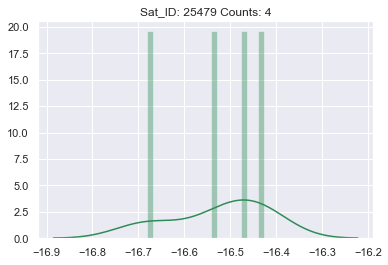

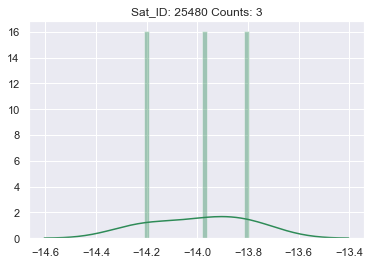

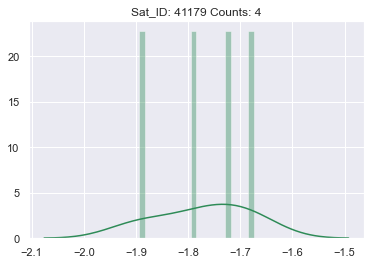

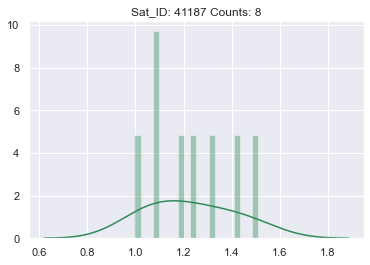

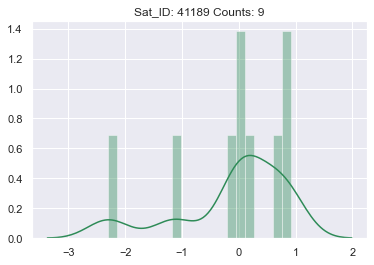

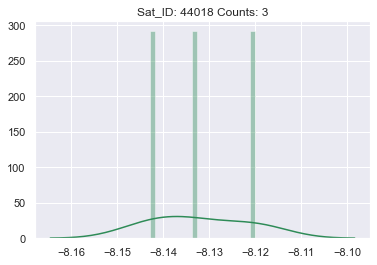

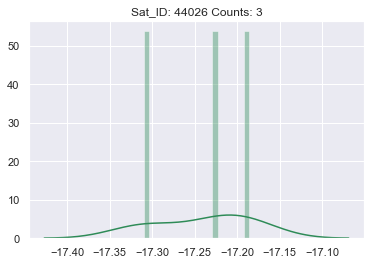

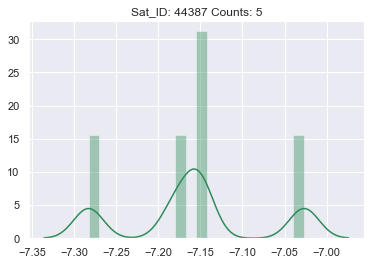

In [18]:
for v in values:
    hist_plt(v)
    plt.show()

In [19]:
bad_indices = []
bad_indices.extend((np.where(np.asarray(s_data) == 25119)[0]).tolist())
bad_indices.extend((np.where(np.asarray(s_data) == 25479)[0]).tolist())
bad_indices.extend((np.where(np.asarray(s_data) == 25480)[0]).tolist())
bad_indices.extend((np.where(np.asarray(s_data) == 44026)[0]).tolist())

t_data_cleaned = np.delete(np.asarray(t_data), bad_indices)

-1.6745949
4.240095513153076
33


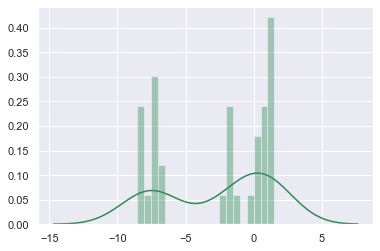

In [20]:
sns.distplot(t_data_cleaned, bins=20, color='seagreen')
print(np.median(t_data_cleaned))
print(mad(t_data_cleaned))
print(len(t_data_cleaned))


In [21]:
33/47

0.7021276595744681